<a href="https://colab.research.google.com/github/maxant38/Optimization-Algorihms-on-Michalewicz-function/blob/main/TP_Bonus_UP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP Bonus UP4 - Maxence CAILLE**

# **Création Fonction Michalewicz en Python**

Dans un premier temps je refais la fonction du code R en python. Je reprends le m = 10.

In [1]:
import math

def michalewicz(x, m):
  # Initilisation
  f = 0
  
  # Loop pour chaque élément du vecteur
  for i, xi in enumerate(x):
    f += -math.sin(xi) * math.pow(math.sin(i * xi**2 / math.pi), 2*m)
    
  return f


In [2]:
#test
x = [1.0, 2.0, 3.0]
m = 10
print(michalewicz(x, m))


-0.37014331283611873


# **Plot de la fonction Michalewicz**

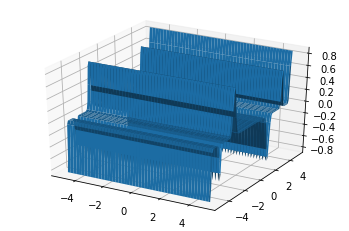

In [3]:

import matplotlib.pyplot as plt
import numpy as np

# On peut plot la fonction
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calcule des valeurs pour les différents points
Z = np.zeros_like(X)
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    Z[i, j] = michalewicz([X[i, j], Y[i, j]], m)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()


# **Détermination du minimum globale**


D'après "internet": 
En général, l'optimum global se produit à x[i] = i * π / n, où i est l'indice de l'élément dans le vecteur x. 

In [4]:
#On fait une fonction pour tester cela.
def global_optima(d, m):
  optima = []
  
  # en utilisant la formule précédente
  for i in range(1, d+1):
    optima.append((2*i-1)/2)
    
  return optima

In [5]:

# génère un individu aléatoire
def generate_random_individual():
  return np.random.uniform(low=0, high=np.pi, size=d)

# évalue l'individu en utilisant la fonction de Michalewicz
def evaluate_individual(x):
  return michalewicz(x,m)

## **Simple stochastic optimizers**

### **Random Search**

In [6]:
import random
def random_search(d, m, num_iterations):
  # Initialiser la meilleure solution trouvée jusqu'à présent à une valeur élevée
  best_solution = float("inf")
  
  # Répéter le processus de recherche pour le nombre d'itérations spécifié
  for _ in range(num_iterations):
    # Générer une solution aléatoire
    solution = [random.uniform(-5, 5) for _ in range(d)]
    
    # Évaluer la solution
    solution_value = michalewicz(solution, m)
    
    # Mettre à jour la meilleure solution si nécessaire
    if solution_value < best_solution:
      best_solution = solution_value
      best_solution_vector = solution
      
  # Renvoyer la meilleure solution trouvée
  return best_solution_vector, best_solution




In [7]:
# Définir le nombre d'itérations
num_iterations = 5000

# Exécuter la recherche aléatoire
best_solution, best_value = random_search(5, m, num_iterations)

# Afficher la meilleure solution et sa valeur
print("Meilleure solution :", best_solution)
print("Meilleure valeur :", best_value)

Meilleure solution : [-0.6409642544569643, -4.953252566549885, 0.5962905640998626, 1.320897779676434, -4.316248302476728]
Meilleure valeur : -2.5536846884711126


Cette méthode de recherche aléatoire n'est pas garantie pour trouver les optima globaux de la fonction de Michalewicz, car il s'agit d'une méthode stochastique qui dépend des solutions aléatoires générées. Cependant, elle peut être efficace pour trouver de bonnes solutions au problème, surtout si le nombre d'itérations est augmenté.

### **ES-(1+1)**

In [8]:
import numpy as np

# constantes
m = 10

# génère un individu aléatoire
def generate_random_individual():
  return np.random.uniform(low=0, high=np.pi, size=d)

# évalue l'individu en utilisant la fonction de Michalewicz
def evaluate_individual(x):
  return michalewicz(x,m)

# algorithme ES-(1+1)
def es_1_plus_1(max_iterations):
  # génère un individu initial
  x = generate_random_individual()
  x_fitness = evaluate_individual(x)

  for i in range(max_iterations):
    # génère un mutant
    y = x + np.random.normal(scale=0.1, size=d)
    y_fitness = evaluate_individual(y)

    # remplace x par y si y est meilleur
    if y_fitness < x_fitness:
      x = y
      x_fitness = y_fitness
  
  return x, x_fitness




In [10]:
#test 
d=5
# appelle l'algorithme ES-(1+1)
x_opt, fitness_opt = es_1_plus_1(max_iterations=5000)

# affiche le résultat
print(f"Minimum global trouvé: {fitness_opt}")
print(f"Valeur de x qui minimise la fonction: {x_opt}")

Minimum global trouvé: -1.8970576095094622
Valeur de x qui minimise la fonction: [0.0590858  3.01698064 0.49798939 1.28636366 1.92436656]


## **Simulated annealing**

In [11]:
import numpy as np

# constantes
m = 10




# algorithme de recuit simulé
def simulated_annealing(max_iterations, initial_temperature, cooling_rate):
  # génère un individu initial
  x = generate_random_individual()
  x_fitness = evaluate_individual(x)

  temperature = initial_temperature

  for i in range(max_iterations):
    # génère un mutant
    y = x + np.random.normal(scale=0.1, size=d)
    y_fitness = evaluate_individual(y)

    # calcule la différence de fitness
    delta = y_fitness - x_fitness

    # accepte y si y est meilleur, sinon accepte y avec une probabilité dépendante de la température et de la différence de fitness
    if delta > 0:
      x = y
      x_fitness = y_fitness
    else:
      acceptance_probability = np.exp(delta / temperature)
      if np.random.uniform() < acceptance_probability:
        x = y
        x_fitness = y_fitness
    
    # refroidit la température
    temperature *= 1 - cooling_rate
  
  return x, x_fitness



In [12]:
# test
x_opt, fitness_opt = simulated_annealing(max_iterations=1000, initial_temperature=100, cooling_rate=0.001)

# affiche le résultat
print(f"Minimum global trouvé: {fitness_opt}")
print(f"Valeur de x qui minimise la fonction: {x_opt}")

Minimum global trouvé: 0.25888134838482996
Valeur de x qui minimise la fonction: [ 3.74113741 -2.43771495 -1.86553715  9.8800093   0.50396026]


## **CMA-ES**

In [13]:
pip install cma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 249 kB 37.3 MB/s 


In [14]:
import cma
import numpy as np

# constantes
m = 10


# génère un individu aléatoire
def generate_random_individual():
  return np.random.uniform(low=0, high=np.pi, size=d)

# évalue l'individu en utilisant la fonction de Michalewicz
def evaluate_individual(x):
  return michalewicz(x,m)


# appelle l'algorithme CMA-ES
res = cma.fmin(evaluate_individual, np.zeros(d), 0.5, options={"bounds": [0, np.pi]})



(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=893331, Tue Jan  3 13:15:53 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -8.515957488067872e-01 1.0e+00 6.16e-01  6e-01  7e-01 0:00.0
    2     16 -6.457312204712955e-01 1.4e+00 6.88e-01  6e-01  8e-01 0:00.0
    3     24 -4.886673355984980e-01 1.5e+00 6.82e-01  6e-01  8e-01 0:00.0
  100    800 -1.437204814431894e+00 2.3e+01 3.58e+00  3e+00  5e+00 0:00.2
  200   1600 -3.529031623736634e+00 4.0e+00 5.03e-02  3e-03  6e-03 0:00.4
  300   2400 -3.698857098409225e+00 3.8e+01 1.88e-04  3e-07  1e-05 0:00.5
  332   2656 -3.698857098466638e+00 9.5e+01 1.17e-05  7e-09  7e-07 0:00.6
termination on tolfun=1e-11 (Tue Jan  3 13:15:54 2023)
final/bestever f-value = -3.698857e+00 -3.698857e+00
incumbent solution: [0.451252692389577, 2.202905512766183, 1.5707963407954857, 1.2849915723381975, 1.9230584713741372]
std deviation: [6.547292695480937e-07, 2.040919693989566e-08, 1.5413617027097218e-08, 1.01306

In [15]:
# affiche le résultat
print(f"Minimum global trouvé: {res[1]}")
print(f"Valeur de x qui minimise la fonction: {res[0]}")


Minimum global trouvé: -3.698857098466638
Valeur de x qui minimise la fonction: [0.45125284 2.20290551 1.57079633 1.28499157 1.92305847]


## **Comparaison des différentes méthodes**

In [16]:
import pandas as pd

# listes des dimensions et des méthodes
dimensions = [2, 3, 5, 10, 20]
methodes = ["Random Search-1000","Random Search-5000", "ES-(1+1)-1000", "ES-(1+1)-5000" ,"Simulated annealing-1000","Simulated annealing-5000", "CMA-ES"]

# crée le dataframe vide
df = pd.DataFrame(index=dimensions, columns=methodes)

print(df)


   Random Search-1000 Random Search-5000 ES-(1+1)-1000 ES-(1+1)-5000  \
2                 NaN                NaN           NaN           NaN   
3                 NaN                NaN           NaN           NaN   
5                 NaN                NaN           NaN           NaN   
10                NaN                NaN           NaN           NaN   
20                NaN                NaN           NaN           NaN   

   Simulated annealing-1000 Simulated annealing-5000 CMA-ES  
2                       NaN                      NaN    NaN  
3                       NaN                      NaN    NaN  
5                       NaN                      NaN    NaN  
10                      NaN                      NaN    NaN  
20                      NaN                      NaN    NaN  


In [17]:
#On va le remplir avec les valeurs obtenues
m=10

for d in dimensions:
  for methode in methodes:
    
    if methode == methodes[0]:
      best_solution, best_value = random_search(5, m, num_iterations=1000)
      df.loc[d,methode] = best_value 

    if methode == methodes[1]:
      best_solution, best_value = random_search(5, m, num_iterations=5000)
      df.loc[d,methode] = best_value 

    if methode == methodes[2]:
      x_opt, fitness_opt = es_1_plus_1(max_iterations=1000)
      df.loc[d,methode] = fitness_opt 

    if methode == methodes[3]:
      x_opt, fitness_opt = es_1_plus_1(max_iterations=5000)
      df.loc[d, methode] = fitness_opt 

    if methode == methodes[4]:
      x_opt, fitness_opt = simulated_annealing(max_iterations=1000, initial_temperature=100, cooling_rate=0.001)
      df.loc[d, methode] = fitness_opt

    if methode == methodes[5]:
      x_opt, fitness_opt = simulated_annealing(max_iterations=5000, initial_temperature=100, cooling_rate=0.001)
      df.loc[d, methode] = fitness_opt
    
    
    if methode == methodes[6]:
      res = cma.fmin(evaluate_individual, np.zeros(d), 0.5, options={"bounds": [0, np.pi]})
      df.loc[d, methode] = res[1]
  
    


(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=815628, Tue Jan  3 13:16:00 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -1.054839383220923e-14 1.0e+00 6.17e-01  7e-01  7e-01 0:00.0
termination on tolfun=1e-11 (Tue Jan  3 13:16:00 2023)
final/bestever f-value = -1.012748e-31 -1.054839e-14
incumbent solution: [0.6305722431480711, 0.306723486634823]
std deviation: [0.695921734419351, 0.6995348403350437]
(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=874700, Tue Jan  3 13:16:00 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 -2.156991946264828e-08 1.0e+00 5.45e-01  6e-01  6e-01 0:00.0
    2     14 -6.367824391212999e-03 1.4e+00 6.71e-01  6e-01  8e-01 0:00.0
    3     21 -5.476126227746344e-02 1.8e+00 7.71e-01  8e-01  1e+00 0:00.0
  100    700 -1.801303173444824e+00 3.3e+02 9.78e-02  5e-04  2e-01 0:00.2
NOTE (module=cma, iteration=141):  
condition in coordinate system exceeded 1.0e+08

In [18]:
df

,Random Search-1000,Random Search-5000,ES-(1+1)-1000,ES-(1+1)-5000,Simulated annealing-1000,Simulated annealing-5000,CMA-ES
2,-1.858953,-2.70146,-0.801303,-0.801303,0.340543,0.687247,-0.0
3,-1.748945,-2.33948,-1.213572,-0.801303,-0.001789,0.0,-1.801303
5,-2.303692,-2.392922,-2.835816,-0.273133,-0.002435,-0.060379,-3.109876
10,-2.373715,-2.700261,-3.942188,-4.391409,2.001721,1.175901,-7.663712
20,-1.90382,-2.3324,-6.369313,-7.422631,-0.333386,1.281748,-15.807868


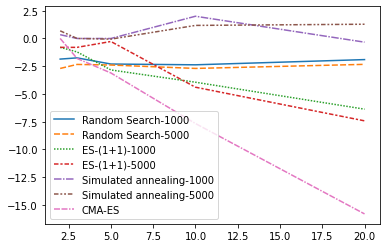

<Figure size 1152x576 with 0 Axes>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#plot
sns.lineplot(data=df)
plt.figure(figsize=(16,8))

# affiche le graphique
plt.show()
